In [0]:
# Imports
import cv2
from google.colab.patches import cv2_imshow

In [0]:
# Data Directory
DATA_DIR = '/content/drive/My Drive/capstone_data'

In [0]:
# Sample image
img_path = DATA_DIR + '/Places365_test_00000003.jpg'

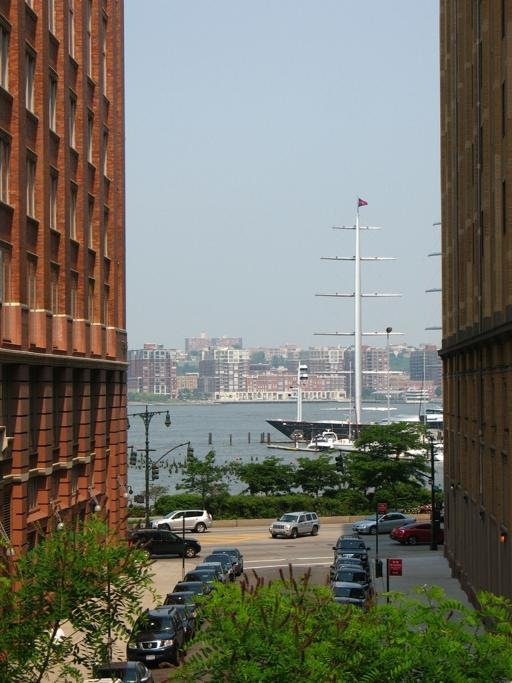

In [107]:
# Originial image
img = cv2.imread(img_path)
cv2_imshow(img)

In [108]:
img.shape

(683, 512, 3)

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Round Function
def round_numpy_array(numpy_array):
  new_rounded_list = []

  for row in numpy_array:
    new_row = []
    for element in row:
      new_row.append(round(element, -1))
    new_rounded_list.append(new_row)
  
  return new_rounded_list

In [0]:
# Find color array index
def calculate_color_array_index(ab_list):
  a = ab_list[0]
  b = ab_list[1]

  index = int((a / 10 * 25) + (b / 10))

  return index

In [0]:
# Round and calculate
def round_and_calculate(a_list, b_list):
  rounded_a_list = round_numpy_array(a_list)
  rounded_b_list = round_numpy_array(b_list)
  index_array = []

  for i in range(0, len(rounded_a_list)):
    new_row = []
    for j in range(0, len(rounded_a_list[i])):
      index = calculate_color_array_index([rounded_a_list[i][j], rounded_b_list[i][j]])
      new_row.append(index)
    index_array.append(new_row)
  
  return index_array

In [0]:
def process_image(image_path, width, height):
  img = cv2.imread(image_path) # read image
  img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) # convert from BGR to LAB
  resized_img = cv2.resize(img_lab, (width,height)) # resize image

  # split into L, a and b
  L_array = resized_img[:, :, 0]
  a_array = resized_img[:, :, 1]
  b_array = resized_img[:, :, 2]

  target_array = round_and_calculate(a_array, b_array)

  return (L_array, target_array)

In [0]:
L, y = process_image(img_path, 220, 220)

In [115]:
print(L)

[[ 46  42  47 ...  60  66  65]
 [ 48  45  43 ...  59  68  65]
 [ 57  56  43 ...  59  64  57]
 ...
 [ 49  29  72 ...  47  66  71]
 [ 18  36  43 ...  77  61  59]
 [ 18  52  22 ...  80  91 122]]


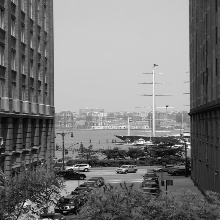

In [116]:
cv2_imshow(L)

In [117]:
print(y)

[[364, 364, 364, 364, 365, 390, 391, 390, 365, 364, 364, 364, 364, 364, 391, 416, 416, 390, 365, 364, 364, 364, 364, 365, 391, 391, 390, 365, 364, 363, 364, 365, 391, 391, 390, 390, 364, 339, 339, 390, 391, 390, 389, 363, 364, 365, 390, 390, 364, 364, 365, 364, 363, 337, 336, 312, 312, 312, 312, 312, 312, 312, 337, 337, 337, 337, 337, 337, 337, 312, 312, 312, 312, 312, 312, 312, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 337, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339

In [0]:
# Create Color Array
# min = 0, max = 250, interval = 10
def create_color_array(min, max, interval):
  ab_color_list = []

  for i in range(min, max, interval):
    for j in range(min, max, interval):
      ab_color_list.append([i, j])
      j += interval
    i += interval
  
  return ab_color_list

In [0]:
ab_color_list = create_color_array(0, 260, 10)

In [120]:
print(ab_color_list)

[[0, 0], [0, 10], [0, 20], [0, 30], [0, 40], [0, 50], [0, 60], [0, 70], [0, 80], [0, 90], [0, 100], [0, 110], [0, 120], [0, 130], [0, 140], [0, 150], [0, 160], [0, 170], [0, 180], [0, 190], [0, 200], [0, 210], [0, 220], [0, 230], [0, 240], [0, 250], [10, 0], [10, 10], [10, 20], [10, 30], [10, 40], [10, 50], [10, 60], [10, 70], [10, 80], [10, 90], [10, 100], [10, 110], [10, 120], [10, 130], [10, 140], [10, 150], [10, 160], [10, 170], [10, 180], [10, 190], [10, 200], [10, 210], [10, 220], [10, 230], [10, 240], [10, 250], [20, 0], [20, 10], [20, 20], [20, 30], [20, 40], [20, 50], [20, 60], [20, 70], [20, 80], [20, 90], [20, 100], [20, 110], [20, 120], [20, 130], [20, 140], [20, 150], [20, 160], [20, 170], [20, 180], [20, 190], [20, 200], [20, 210], [20, 220], [20, 230], [20, 240], [20, 250], [30, 0], [30, 10], [30, 20], [30, 30], [30, 40], [30, 50], [30, 60], [30, 70], [30, 80], [30, 90], [30, 100], [30, 110], [30, 120], [30, 130], [30, 140], [30, 150], [30, 160], [30, 170], [30, 180], [3

In [122]:
# a, b values for class 500
# a = 190, b = 60
ab_color_list[500]

[190, 60]